# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Things that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Python (Jupyter notebooks) and Linear Regression. Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Function to calculate the Gradiend descent

In [2]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    thetaHist=np.empty([maxsteps, 2])
    xTrans = x.transpose()
    for i in range(0, maxsteps):
        hypothesis = np.dot(x,theta)
        loss = hypothesis - y   
        theta0 = 1/m * np.sum(loss)
        theta1 = 1/m * np.sum(np.dot(xTrans,loss))
        theta = theta - alpha/m * np.sum([theta0,theta1,np.dot(xTrans,loss)])
        thetaHist[i] = theta
    return theta, thetaHist                            

## Function to calcultate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the debugging (having not only the cost but also the difference between y and the prediction directly). You do not need to use both. Just the cost is enough to complete the assignment.

In [3]:
def costFunction(x, y, theta):
    # HERE YOU HAVE TO IMPLEMENT THE COST FUNCTION
    hypothesis = np.dot(x,theta)
    loss = (hypothesis - y)
    cost = (np.sum(loss))**2
    return cost, loss

## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with different samples). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [4]:
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [5]:
m, n = np.shape(x)

## Plot training set


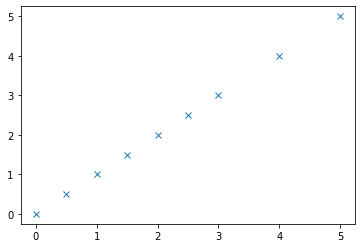

In [6]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [7]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)
J = np.zeros((len(theta0), len(theta1)))

# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        theta = [theta0[i], theta1[j]] 
        J[i,j], loss = costFunction(x, y, theta)

## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


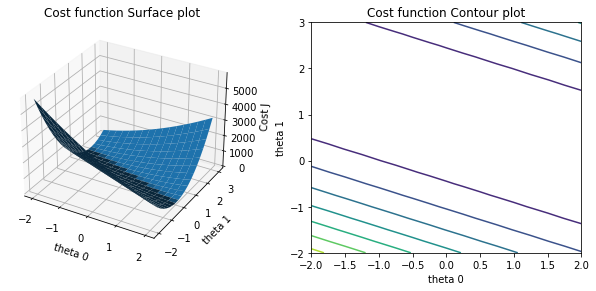

In [8]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [9]:
alpha = 0.05        # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

/Users/alisatodorova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Print found optimal values



In [10]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])



Optimized Theta0 is  9.318698275090868e-08
Optimized Theta1 is  0.9999999694295416


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


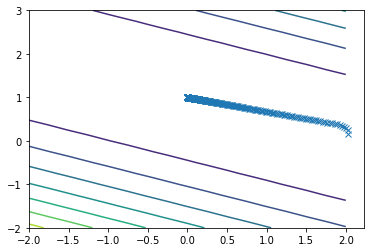

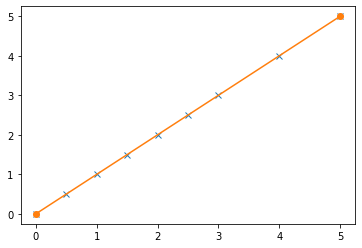

In [11]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

## What happens if the learning rate is too low?

/Users/alisatodorova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


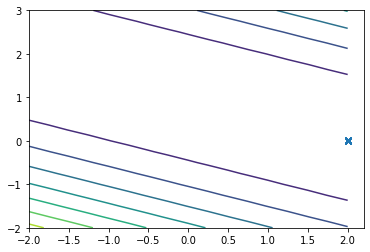

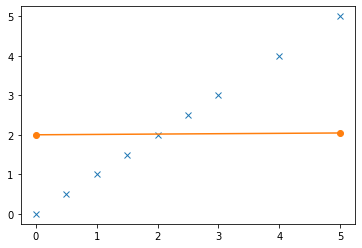

In [12]:
alpha_low = 0.000003        # learning parameter is too low
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha_low, m, maxsteps)

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

As we can see, the method doesn't converge. When the learning rate is too low, the gradient descent method takes very small steps on each iteration and thus, it might take a lot of time to converge.

##  What happens if the learning rate is too high?

/Users/alisatodorova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


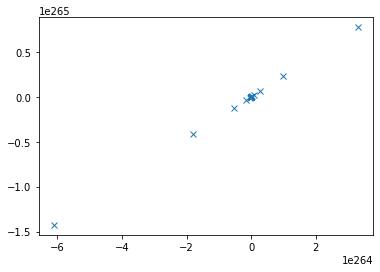

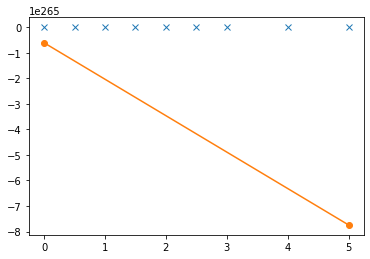

In [13]:
alpha_high = 0.3        # learning parameter is too high
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha_high, m, maxsteps)

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

As we can see, the method doesn't converge. When the learning rate is too high, the gradient descent method increases the objective value (which is the function of theta0 and theta1, i.e. the cost function). Further, because of the too high learning rate, the method is taking big steps down the slope, as we can also see from the graph above.

## Can Linear Regression really find the absolute global minimum? Explain why/why not.

Yes, because linear regression gives convex solution, i.e. it converges. Further, we have that cost functions are always convex, and a convex function has only global minimum. We don't have local minima because at a local minimum, the gradient descent method won't change its parameters as the derivative is zero.

## What effect does it have if you change the initial guess for thet0 and thet1 for the gradient descent to something completely off?

Optimized Theta0 is  76.74303867226594
Optimized Theta1 is  -24.175939820907058


/Users/alisatodorova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


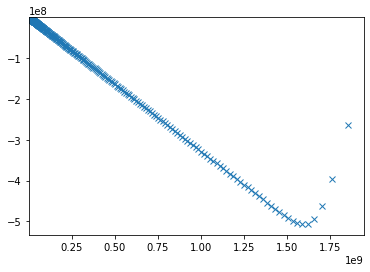

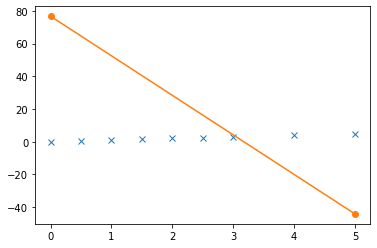

In [14]:
alpha = 0.05        # learning parameter 
maxsteps = 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2000000000, -10000]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Print found new optimal values
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])


# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

As we can see, the method doesn't converge and (see the printed optimized values) the difference between theta0 and theta1 is bigger than when thet = [2, 0]. Further, the method is again taking big steps down the slope, but also theta1 starts much higher than theta0.

## What happens if you are not updating thet0 and thet1 “simultaneously” as you should but you are updating both parameters in separate for-loops (see code)?

In [15]:
def gradientDescentNew(x, y, theta, alpha, m, maxsteps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    thetaHist=np.empty([maxsteps, 2])
    xTrans = x.transpose()
    for i in range(0, maxsteps):
        hypothesis = np.dot(x,theta)
        loss = hypothesis - y   
        theta0 = 1/m * np.sum(loss)
    for i in range(0, maxsteps):
        hypothesis = np.dot(x,theta)
        loss = hypothesis - y   
        theta1 = 1/m * np.sum(np.dot(xTrans,loss))
        
    theta = theta - alpha/m * np.sum([theta0,theta1,np.dot(xTrans,loss)])
    thetaHist[i] = theta
    return theta, thetaHist       

/Users/alisatodorova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


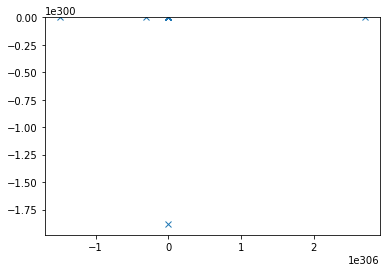

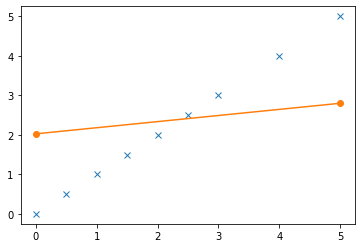

In [16]:
alpha = 0.05        # learning parameter 
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescentNew(x, y, thet, alpha, m, maxsteps)

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

First we move theta0 to the left or right, then we move theta1 up or down, but they both try to maintain a slope, in order to move towards the direction of the minimum. However, since theta0 and theta1 are not simultaenously updated, as we can see, the slope isn't correct and the method doesn't converge. 

## How many iterations of the gradient descent algorithm do you have to calculate to reach the correct exact values of theta0 and theta1?

/Users/alisatodorova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Cost is  0.00761233083825454


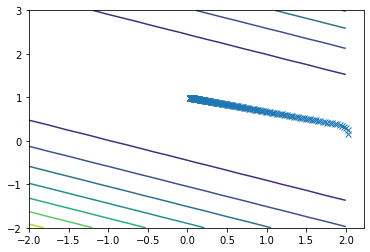

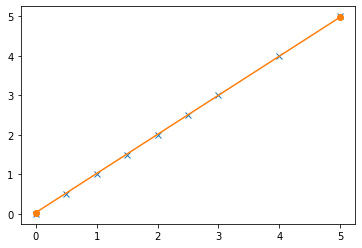

In [17]:
alpha = 0.05        # learning parameter 
maxsteps = 245      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

## Cost
cost, loss = costFunction(x, y, thet)
print("Cost is ",cost)

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

Around 245 iterations of the gradient descent algorithm are needed for the method to calculate and reach the correct exact values of theta0 and theta1. We can say that because this is when the method first converges. Further, the cost is decreased compared to when we had maxsteps=1000, so this means that the gradient is working correctly.